# Try to implement Liu et al, just for longer periods of time

In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Build scores between 0 and 100, some people have mean of 30, others have 70.

In [2]:
def create_population(blue_mu, orange_mu, sigma=10, number_of_people=100, lower_bound=10, higher_bound=90):
    
    blues = np.random.normal(blue_mu, sigma, (number_of_people,1))
    oranges = np.random.normal(orange_mu, sigma, (number_of_people,1))
    
    blues[blues > higher_bound] = higher_bound
    blues[blues < lower_bound] = lower_bound
    
    oranges[oranges > higher_bound] = higher_bound
    oranges[oranges < lower_bound] = lower_bound
    
    return blues, oranges

In [3]:
blue_mu = 30
orange_mu = 70
number_of_people = 1000

blues, oranges = create_population(blue_mu, orange_mu, number_of_people=number_of_people)

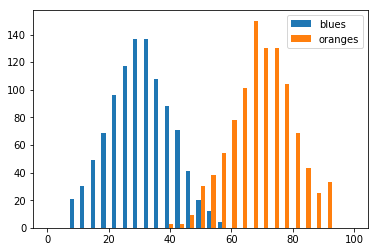

In [4]:
bins = np.linspace(0, 100, 30)
plt.hist([blues, oranges], bins, label=['blues', 'oranges'])
plt.legend(loc='upper right')
plt.show()

In [5]:
def classification_shift(blues, oranges, number_of_people=1000, amount_up=2, amount_down=2):
    
    probabilities_blue = np.random.uniform(0, 1, (number_of_people,1))
    probabilities_orange = np.random.uniform(0, 1, (number_of_people,1))

    shift_blue = probabilities_blue < (blues/100)
    shift_orange = probabilities_orange < (oranges/100)
    
    blues[shift_blue] += amount_up
    blues[not shift_blue.all()] -= amount_down
    blues[blues < 10] = 10
    blues[blues > 90] = 90
    
    oranges[shift_orange] += amount_up
    oranges[not shift_orange.all()] -= amount_down
    oranges[oranges < 10] = 10
    oranges[oranges > 90] = 90
    
    return blues, oranges

def natural_shift(blues, oranges, true_mean=60, by_how_much=3):
    if np.mean(blues) < true_mean:
        blues += by_how_much
    elif np.mean(blues) > true_mean:
        blues -= by_how_much
        
    if np.mean(oranges) < true_mean:
        oranges += by_how_much
    elif np.mean(oranges) > true_mean:
        oranges -= by_how_much
    
    return blues, oranges
    

def iterate_natural(blues, oranges, iters = 5):
    mean_history = np.zeros((iters, 2))
    
    blues_history = np.copy(blues)
    blues_history = np.concatenate((blues_history, np.zeros(blues_history.shape), np.zeros(blues_history.shape)), axis=1)
    
    oranges_history = np.copy(oranges)
    oranges_history = np.concatenate((oranges_history, np.ones(oranges_history.shape), np.zeros(oranges_history.shape)), axis=1)

    new_blues, new_oranges = natural_shift(blues, oranges)
    
    for i in range(iters):
        new_blues, new_oranges = natural_shift(new_blues, new_oranges)
        concat_blues = np.concatenate((new_blues, np.zeros(new_blues.shape), np.multiply(np.ones(new_blues.shape),i)), axis=1)
        concat_oranges = np.concatenate((new_oranges, np.ones(new_oranges.shape), np.multiply(np.ones(new_oranges.shape),i)), axis=1)
        mean_history[i, 0] = np.mean(new_blues)
        mean_history[i, 1] = np.mean(new_oranges)
        blues_history = np.concatenate((blues_history, concat_blues), axis=0)
        oranges_history = np.concatenate((oranges_history, concat_oranges), axis=0)
        
    return new_blues, new_oranges, mean_history, blues_history, oranges_history

def iterate(blues, oranges, iters = 5):
    mean_history = np.zeros((iters, 2))
    blues_history = np.zeros((len(blues), iters))
    oranges_history = np.zeros((len(oranges), iters))
    new_blues, new_oranges = natural_shift(blues, oranges)
    for i in range(iters):
        new_blues, new_oranges = classification_shift(new_blues, new_oranges)
        new_blues, new_oranges = natural_shift(new_blues, new_oranges)
        mean_history[i, 0] = np.mean(new_blues)
        mean_history[i, 1] = np.mean(new_oranges)
        blues_history[:,i] = new_blues[0]
        
    return new_blues, new_oranges, mean_history, blues_history

# Start experimenting with changes the mean values

## Iterate naturally, using only gradual shifts back to true distribution

In [6]:
blue_mu = 45
orange_mu = 55
true_mu = 55
number_of_people = 1000

blues, oranges = create_population(blue_mu, orange_mu, number_of_people=number_of_people)

blues.shape

(1000, 1)

In [7]:
new_blues, new_oranges, history, blues_history, oranges_history = iterate_natural(blues, oranges, iters = 20)

In [8]:
blues_history.shape

(21000, 3)

In [9]:
print(blues_history)

[[32.68810273  0.          0.        ]
 [45.99097962  0.          0.        ]
 [30.57902571  0.          0.        ]
 ...
 [67.8823374   0.         19.        ]
 [52.0414543   0.         19.        ]
 [52.14410048  0.         19.        ]]


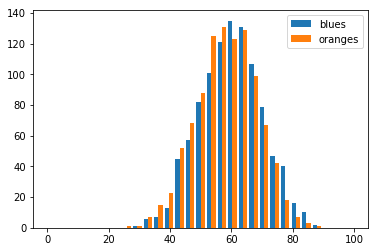

In [10]:
bins = np.linspace(0, 100, 30)
plt.hist([blues, oranges], bins, label=['blues', 'oranges'])
plt.legend(loc='upper right')
plt.show()

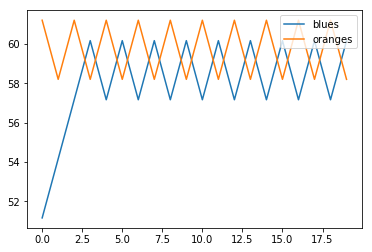

In [11]:
plt.plot(history[:, 0], label='blues')
plt.plot(history[:, 1], label='oranges')
plt.legend(loc='upper right')
plt.show()

## Include problematic stuff

In [12]:
blue_mu = 45
orange_mu = 55
true_mu = 55
number_of_people = 1000

blues, oranges = create_population(blue_mu, orange_mu, number_of_people=number_of_people)

In [13]:
new_blues, new_oranges, history = iterate(blues, oranges, iters = 40)

ValueError: too many values to unpack (expected 3)

In [ ]:
bins = np.linspace(0, 100, 30)
plt.hist([blues, oranges], bins, label=['blues', 'oranges'])
plt.legend(loc='upper right')
plt.show()

In [ ]:
plt.plot(history[:, 0], label='blues')
plt.plot(history[:, 1], label='oranges')
plt.legend(loc='upper right')
plt.show()

So there's clearly something going wrong there. 

## Next moves


1. Find people who are gonna default and those who are not
2. Define equalised odds
3. Define max profit

In [ ]:
blue_mu = 45
orange_mu = 55
true_mu = 55
number_of_people = 1000

blues, oranges = create_population(blue_mu, orange_mu, number_of_people=number_of_people)

blues = np.sort(blues, axis=0)

who_is_gonna_default_blue = (blues/100) < np.random.uniform(0, 1, (number_of_people,1))
who_is_gonna_default_orange = (oranges/100) < np.random.uniform(0, 1, (number_of_people,1))

In [ ]:
blue_default = np.multiply(who_is_gonna_default_blue, blues)
blue_not_default = np.abs(who_is_gonna_default_blue - 1)*blues

orange_default = np.multiply(who_is_gonna_default_orange, oranges)
orange_not_default = np.abs(who_is_gonna_default_orange - 1)*oranges

In [ ]:
plt.hist([blue_default[blue_default > 0], blue_not_default[blue_not_default > 0]], bins, label=['default', 'not default'])
plt.legend(loc='upper right')
plt.show()

In [ ]:
plt.hist([orange_default[orange_default > 0], orange_not_default[orange_not_default > 0]], bins, label=['default', 'not default'])
plt.legend(loc='upper right')
plt.show()

## Define false positive and negative rates

The false negative rate is the total number of false negatives divided by the sum of the total number of false negatives and true negatives.

In [ ]:
blue_mu = 45
orange_mu = 55
true_mu = 55
number_of_people = 1000

blues, oranges = create_population(blue_mu, orange_mu, number_of_people=number_of_people)

blues = np.sort(blues, axis=0)

who_is_gonna_default_blue = (blues/100) < np.random.uniform(0, 1, (number_of_people,1))
who_is_gonna_default_orange = (oranges/100) < np.random.uniform(0, 1, (number_of_people,1))

In [ ]:
def false_negative_positive_rate(group, who_is_gonna_default, cutoff, number_of_people = 1000):

    try:
        cutoff_index = np.nonzero(group > cutoff)[0][0]
    except:
        cutoff_index = number_of_people

    total_negative = who_is_gonna_default[0:cutoff_index]
    false_negative_rate = 1 - np.count_nonzero(total_negative) / cutoff_index
    
    total_positive = who_is_gonna_default[cutoff_index:]
    false_positive_rate = np.count_nonzero(total_positive) / (len(total_positive)+1)
    
    return false_negative_rate, false_positive_rate

In [ ]:
def true_negative_positive_rate(group, who_is_gonna_default, cutoff, number_of_people=1000):
    try:
        cutoff_index = np.nonzero(group > cutoff)[0][0]
    except:
        cutoff_index = number_of_people
        
    total_negative = who_is_gonna_default[0:cutoff_index]
    true_negative_rate = np.count_nonzero(total_negative) / cutoff_index
    
    total_positive = who_is_gonna_default[cutoff_index:]
    true_positive_rate = 1 - np.count_nonzero(total_positive) / (len(total_positive)+1)
    
    return true_negative_rate, true_positive_rate

In [ ]:
false_neg = np.zeros((60,1))
false_pos = np.zeros((60,1))
true_neg = np.zeros((60,1))
true_pos = np.zeros((60,1))
for i in range(15, 75):
    false_neg[i-15], false_pos[i-15] = false_negative_positive_rate(blues, who_is_gonna_default_blue, i)
    true_neg[i-15], true_pos[i-15] = true_negative_positive_rate(blues, who_is_gonna_default_blue, i)

In [ ]:
plt.scatter(false_pos, true_pos)
plt.show()

# Plotting


density2d  
binhex  
tile  
violin box plot

Post processing (i.e. adding random noise) might be safer than pure optimisation, since it's easier to overfit the sensitive attributes than the actual problem.

For plotting, you should use seaborn, with binhex, tile, violin box plots, and density2d which is something from ggplot2.

In [65]:
import seaborn as sns
import pandas as pd

blue_mu = 30
orange_mu = 70
true_mu = 70
number_of_people = 100

blues, oranges = create_population(blue_mu, orange_mu, number_of_people=number_of_people)

In [66]:
new_blues, new_oranges, history, blues_history, oranges_history = iterate_natural(blues, oranges, iters = 8)

In [67]:
df = pd.DataFrame(np.concatenate((blues_history, oranges_history), axis=0))
df.columns = ["Credit Scores", "Colour", "Iteration"]
df["Colour"] = df["Colour"].astype(int)
df["Iteration"] = df["Iteration"].astype(int)
df['Colour'] = df['Colour'].map({0: "Blue", 1: "Orange"})
df.tail()

,Credit Scores,Colour,Iteration
1795,70.806649,Orange,7
1796,57.189784,Orange,7
1797,61.777988,Orange,7
1798,70.907040,Orange,7
1799,43.796527,Orange,7


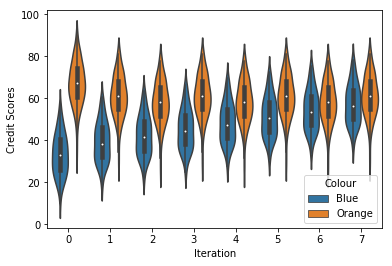

In [68]:
sns.violinplot(x = "Iteration", y = "Credit Scores", hue="Colour", data=df)
plt.show()

In [69]:
for i in range(len(df)):
    if not i%3 == 0:
        df = df.drop(i)

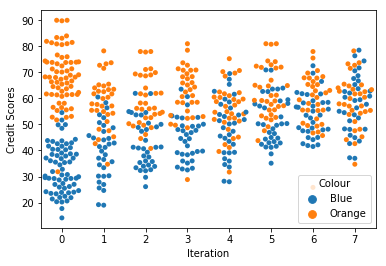

In [74]:
sns.swarmplot(x = "Iteration", y = "Credit Scores", hue="Colour", data=df)
plt.show()

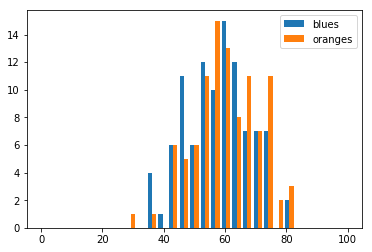

In [46]:
bins = np.linspace(0, 100, 30)
plt.hist([blues, oranges], bins, label=['blues', 'oranges'])
plt.legend(loc='upper right')
plt.show()